# Advanced Numerical Analysis

## Exercise 32

*Write a Matlab program for solving the initial value problem*
$$\begin{cases}
y'' + 101 y' + 100 y = 0 \\
y(0) = 3,\ y'(0) = -102
\end{cases}$$

*after transformation to a system of first order differential equations with*

$\textrm{(i)} \quad$ *Euler’s method,*  
$\textrm{(ii)} \quad$ *the second half step method,*  
$\textrm{(iii)} \quad$ *the third half step method.*

*Use stepsizes* $\frac{1}{8}, \frac{1}{64},$ *and* $\frac{1}{256}$ *and compute until* $t = 3.$ *Compare the results
to the exact solution* $y(t) = 2 e^{−t} + e^{−100t}$ *and explain the findings.*

Written as a system of first order differential equations the given initial value problem is equivalent to
$$\begin{cases}
y'(t) = F(t, y(t)), \quad t\in [0,3] \\
y(0) = (3, -102)^\top
\end{cases}$$
for $y=(y_1,y_2)^\top$ and $F(t, y(t)) = \big(\begin{smallmatrix} 0 & 1 \\ -100 & -101 \end{smallmatrix}\big) y(t).$

In [2]:
y0 = [3; -102];

interval = [0, 3];
step_sizes = [1/8, 1/64, 1/256];
steps = round((interval(2) - interval(1)) ./ step_sizes);

function y_prime = F(t, y)
    % function of the given ODE
    y_prime = [[0 1];[-100 -101]] * y;
endfunction

function y = exact(t)
    % exact solution of the given ODE
    y = 2*exp(-t) + exp(-100*t);
endfunction

In [3]:
function y = modified_Euler(F, y0, t)
    % Returns array [y0, y1, ...] of solution vectors at each point approximated with the modified Euler method.
    %
    % F .... pointer to function of ODE, F(t, y(t)) = y'(t)
    % y0 ... number or array of initial values of ODE, y(t0) = y0
    % t .... list of numbers [t0, t1, ...], discretized interval on which to solve the ODE
    
    n = length(t);
    m = length(y0);
    y = zeros(n, m);
    y(1,:) = y0;
    
    for k = 1 : n-1
        h = t(k+1) - t(k);
        y(k+1,:) = y(k,:) + h * F(t(k) + h/2, y(k,:)' + h/2 * F(t(k), y(k,:)'))';
    endfor
endfunction

function y = Heun_method(F, y0, t)
    % Returns array [y0, y1, ...] of solution vectors at each point approximated with the method of Heun.
    %
    % F .... pointer to function of ODE, F(t, y(t)) = y'(t)
    % y0 ... number or array of initial values of ODE, y(t0) = y0
    % t .... list of numbers [t0, t1, ...], discretized interval on which to solve the ODE
    
    n = length(t);
    m = length(y0);
    y = zeros(n, m);
    y(1,:) = y0;
    
    for k = 1 : n-1
        h = t(k+1) - t(k);
        y(k+1,:) = y(k,:) + h/2 * (F(t(k), y(k,:)') + F(t(k+1), y(k,:)' + h * F(t(k), y(k,:)')))';
    endfor
endfunction

function x = fixed_point_iteration(f, x0, threshold=1e-8, max_iterations=1000, warning=true)
    % Returns approximated fixed point of given function using a simple iteration.
    %
    % f ................ pointer to function that takes input x0
    % x0 ............... number or vector, starting value of iteration that must be viable input for f
    % threshold ........ positive number, if two consecutive values are below this treshold the iteration stops
    % max_iterations ... positive integer, after that many iterations the function returns the last calculated value
    
    x_old = x0;
    
    for _ = 1 : max_iterations
        x = f(x_old);
        if all(abs(x_old - x) <= threshold)
            return
        endif
        x_old = x;
    endfor
    
    if warning
        printf("Fixed point iteration did not converge in %d iterations for threshold %g. Returned last value.\n", max_iterations, threshold)
    endif
endfunction

function y = midpoint_rule(F, y0, t, threshold=1e-8, max_iterations=1000)
    % Returns array [y0, y1, ...] of solution vectors at each point approximated with the implicit midpoint rule.
    %
    % F ................ pointer to function of ODE, F(t, y(t)) = y'(t)
    % y0 ............... number or array of initial values of ODE, y(t0) = y0
    % t ................ list of numbers [t0, t1, ...], discretized interval on which to solve the ODE
    % threshold ........ positive number, if two consecutive values are below this treshold the iteration stops
    % max_iterations ... positive integer, after that many iterations the function returns the last calculated value
    
    n = length(t);
    m = length(y0);
    y = zeros(n, m);
    y(1,:) = y0;
    
    for k = 1 : n-1
        h = t(k+1) - t(k);
        
        function y_prime = g(x)
            y_prime = F(t(k), y(k,:)' + h/2 * x);
        endfunction
        
        y(k+1,:) = y(k,:) + h * fixed_point_iteration(@g, y(k,:)', threshold, max_iterations, warning=false)';
    endfor
endfunction

In [28]:
function comparison1(F, y0, h, plotter=@plot, loc="northeast")
    t = linspace(0, 3, round(3/h));
    
    hold on
    plotter(t, exact(t))
    plotter(t, modified_Euler(F, y0, t)'(1,:))
    plotter(t, Heun_method(F, y0, t)'(1,:))
    plotter(t, midpoint_rule(F, y0, t)'(1,:))
    
    title_string = sprintf("Comparison for a step size of %g", h);
    title(title_string);
    legend("exact solution", "modified Euler method", "method of Heun", "implicit midpoint rule", "location", loc);
endfunction

function comparison2(method, F, y0, steps, plotter=@plot, loc="northeast")
    hold on
    for n = steps
        legend_string = sprintf("h = %g", 3/n);
        t = linspace(0, 3, n);
        plotter(t, method(F, y0, t)'(1,:), "DisplayName", legend_string)
    endfor
    
    plotter(t, exact(t), "DisplayName", "exact")
    
    title_string = sprintf("Comparison of %s", inputname(1));
    title(title_string);
    legend("location", loc);
endfunction

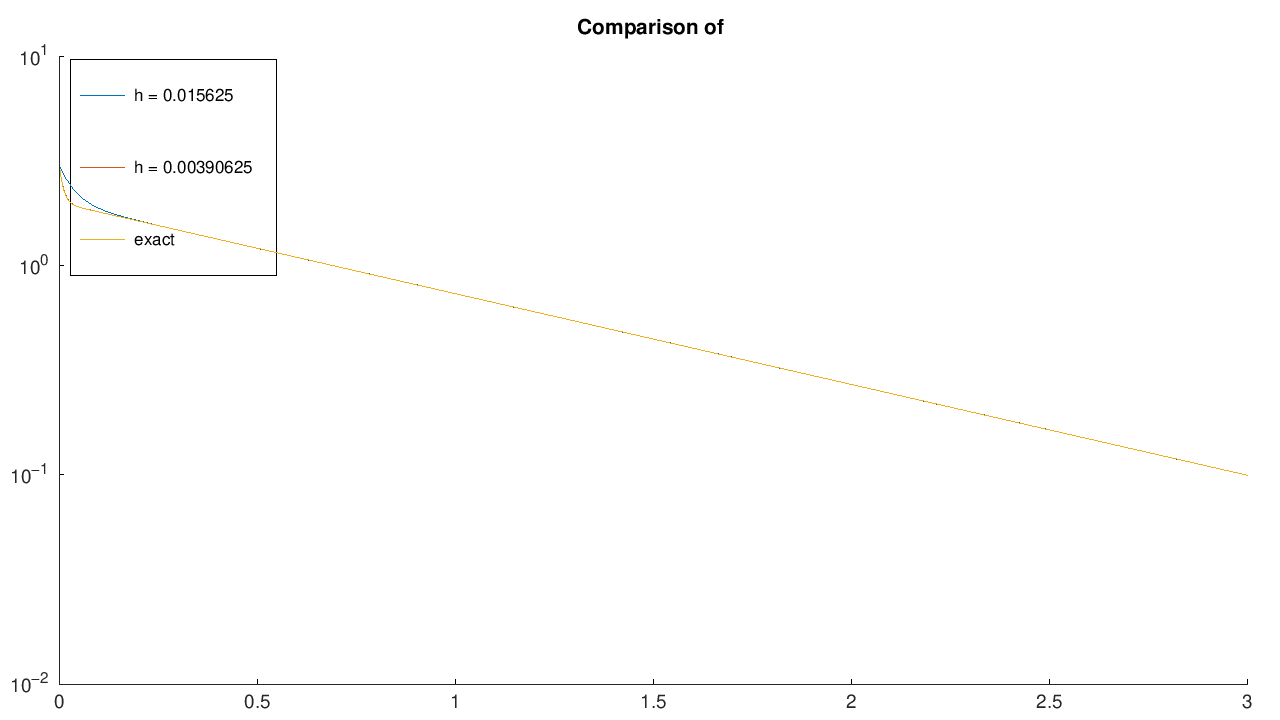

In [29]:
%plot -s 1280,720
comparison2(@modified_Euler, @F, y0, steps(2:end), plotter=@semilogy, loc="northwest")

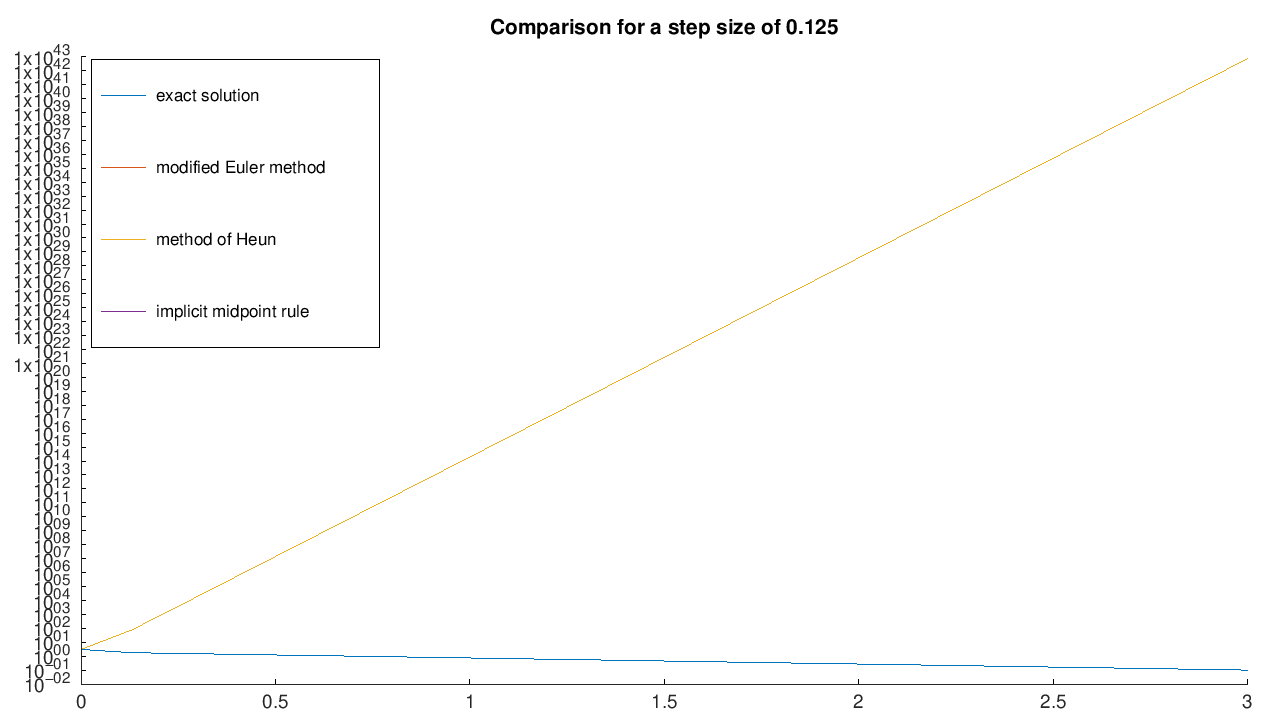

In [10]:
%plot -s 1280,720
compare(@F, y0, 1/8, plotter=@semilogy, "northwest")

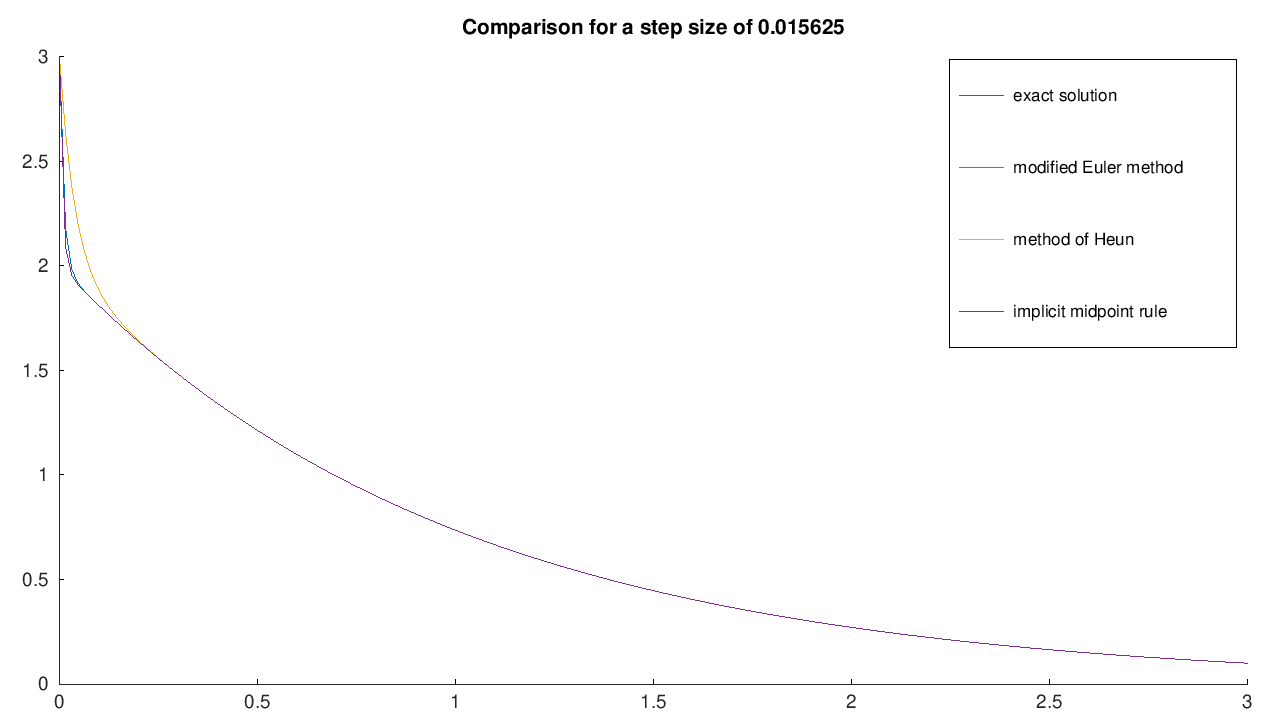

In [14]:
compare(@F, y0, 1/64)

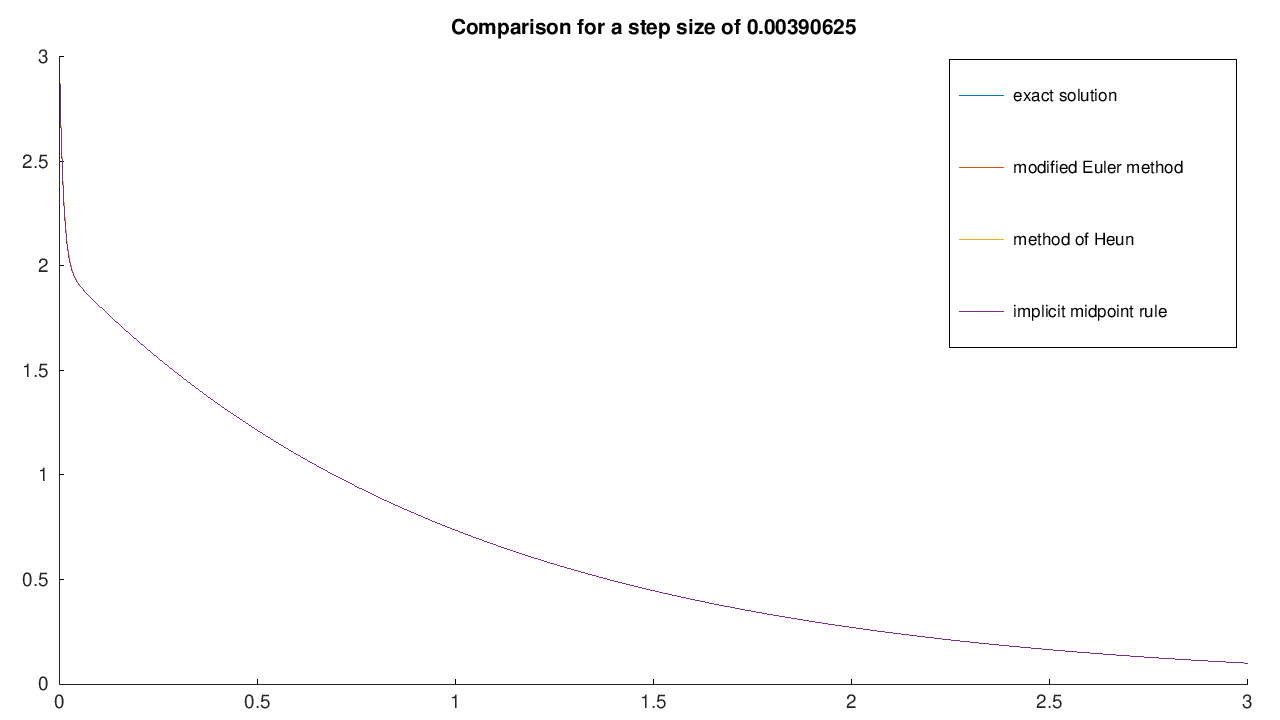

In [15]:
compare(@F, y0, 1/256)

- compare same method for each step size
- plot error per time for each step size of a method
- make table of each method's error to step size
- calculate approximate order of convergence
- make error graphs and compare

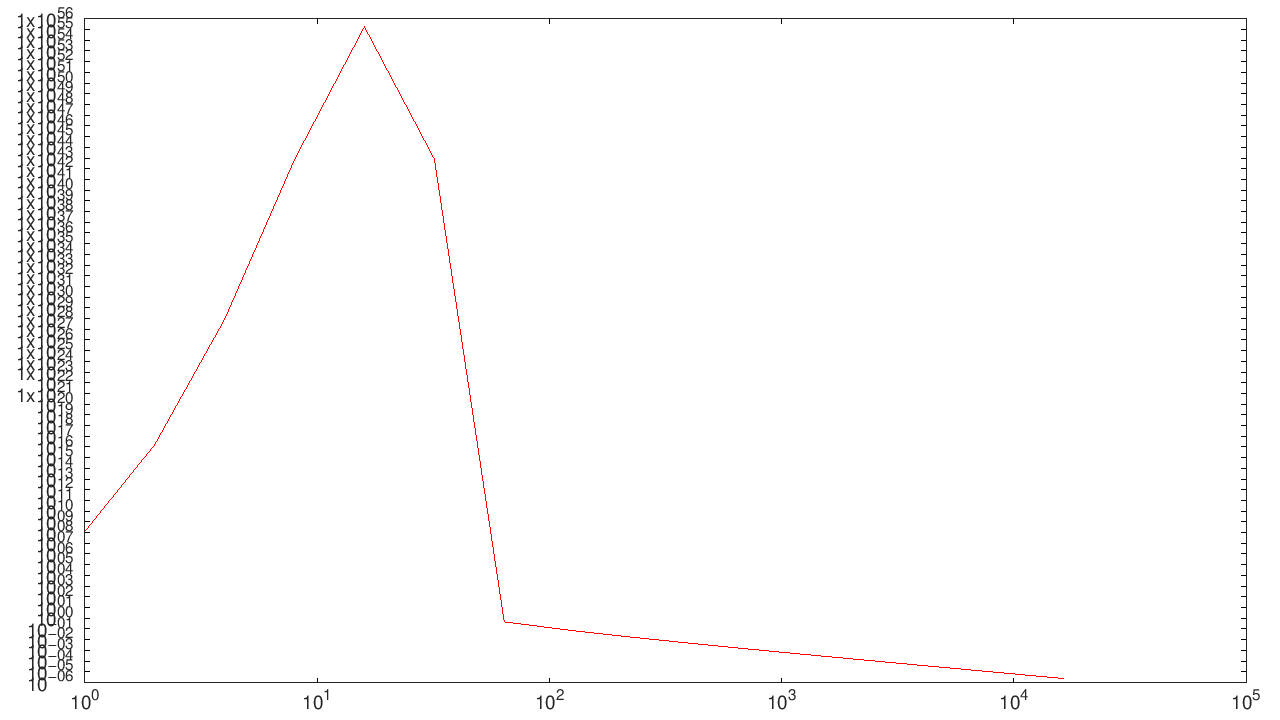

In [146]:
function retval = max_error(n, y0)
    t = linspace(0, 3, 3 * n);
    a = solve1(@F, y0, t)'(1,:);
    b = exact(t);
    retval = max(abs(a - b));
endfunction

steps = 2.^[0:14];
errors = zeros(length(steps), 1);
for i = 1:length(steps)
    errors(i) = max_error(steps(i), y0);
endfor

loglog(steps, errors, "r")